# "Auto-Encoding Variational Bayes", 2014. https://arxiv.org/abs/1312.6114

In [19]:
from matplotlib.patches import Ellipse
import tensorflow as tf
import tensorflow_probability as tfp
from keras.models import Sequential, Model
from tensorflow import keras
from keras.layers import Activation, Dense, Flatten,Reshape
tfd = tfp.distributions
from keras.models import Sequential 
model = Sequential()
from keras import models
tfb = tfp.bijectors
tfpl = tfp.layers
tfb = tfp.bijectors
import numpy as np
import matplotlib.pyplot as plt 
print("TF version:", tf.__version__)
print("TFP version:", tfp.__version__)

TF version: 2.6.0
TFP version: 0.14.0


In [4]:
(x_train, y_train), (x_test,y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [5]:
x_train = x_train.astype("float32")/255

In [6]:
x_test = x_test.astype("float32")/255

In [7]:
class_names = np.array(["T-shirt/top", "Trouser/pants",
                       "Pullover shirt", "Dress", "Coat",
                       "Sandal", "Shirt", "Sneaker", 
                       "Bag", "Ankle boot"])

In [8]:
class_names

array(['T-shirt/top', 'Trouser/pants', 'Pullover shirt', 'Dress', 'Coat',
       'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'], dtype='<U14')

# Display a few examples

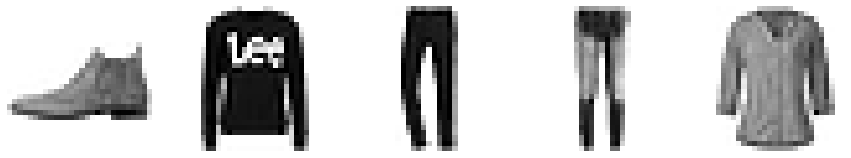

In [9]:
n_examples = 1000
example_images = x_test[0:n_examples]
example_labels = y_test[0:n_examples]
f, axs = plt.subplots(1,5, figsize = (15,4))
for j in range(len(axs)):
    axs[j].imshow(example_images[j], cmap = "binary")
    axs[j].axis("off")

# Define the encoder
- An encoder is a feedforward neural network that with hidden layers that progressively reduce dimensionality.
    - our encoding network will map (28,28) network of images to a 2D vector.
    - our decoder network will reconstruct this 2D vector to a (28,28) image. 
    - we will fit the autoencoder by minimising reconstruction error(A discrepency between models input and output).

In [10]:
encoded_dim = 2
encoder = Sequential([
    Flatten(input_shape = (28,28)),
    Dense(256,activation = "sigmoid"),
    Dense(64, activation = "sigmoid"),
    Dense(encoded_dim)
])

# Define a Decoder

In [11]:
decoder = Sequential([
    Dense(64, activation = "sigmoid",
          input_shape = (encoded_dim,)),
    Dense(256,activation = "sigmoid"),
    Dense(28*28,activation = "sigmoid"),
    Reshape((28,28))
])

# Compile and Fit the model

In [12]:
autoencoder = Model(inputs = encoder.inputs, 
                   outputs = decoder(encoder.outputs))




# Specify a loss

In [13]:
autoencoder.compile(loss = 'binary_crossentropy')

# Fit the model

In [14]:
autoencoder.fit(x= x_train, y = x_train, epochs=12, 
               batch_size = 50)

Epoch 1/12
1200/1200 [==============================] - 5s 4ms/step - loss: 0.4050
Epoch 2/12
1200/1200 [==============================] - 5s 4ms/step - loss: 0.3474
Epoch 3/12
1200/1200 [==============================] - 5s 4ms/step - loss: 0.3385
Epoch 4/12
1200/1200 [==============================] - 5s 4ms/step - loss: 0.3336
Epoch 5/12
1200/1200 [==============================] - 5s 4ms/step - loss: 0.3306
Epoch 6/12
1200/1200 [==============================] - 6s 5ms/step - loss: 0.3283
Epoch 7/12
1200/1200 [==============================] - 6s 5ms/step - loss: 0.3264
Epoch 8/12
1200/1200 [==============================] - 6s 5ms/step - loss: 0.3248
Epoch 9/12
1200/1200 [==============================] - 6s 5ms/step - loss: 0.3235
Epoch 10/12
1200/1200 [==============================] - 6s 5ms/step - loss: 0.3224
Epoch 11/12
1200/1200 [==============================] - 6s 5ms/step - loss: 0.3216
Epoch 12/12
1200/1200 [==============================] - 5s 5ms/step - loss: 0.3209


# Compute the autoencoder's reconstructions

In [18]:
reconstructed_example_images = autoencoder(example_images)

# Evaluate AutoEncoders Reconstruction

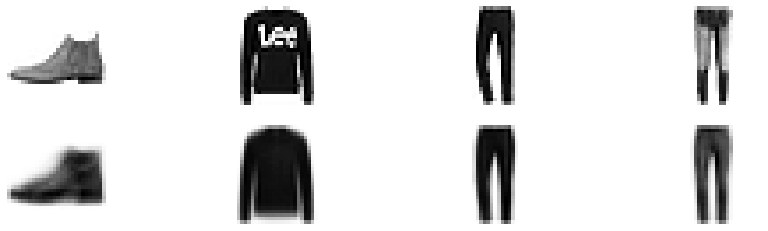

In [16]:

f, axs = plt.subplots(2,4, figsize = (15,4))
for j in range(4):
    axs[0,j].imshow(example_images[j], cmap = "binary")
    axs[1,j].imshow(reconstructed_example_images[j].numpy().squeeze(), cmap = "binary")
    axs[0,j].axis("off")
    axs[1,j].axis("off")
    
    


# Objective Function in VAE is ELBO(Evidence Lower Bound)
- objective function can be written as sum of two terms
    - Expected Reconstruction Loss
    - KL divergence from prior distribution to posterior (KL divergence is a measure of discrepency between this two distributions).
    
- How can a KL divergence be computed between two distribution objects?
- Howw can a KL divergence be used as an objective function to optimize parameters of a distribution in order to minimize the discrepency between it and the target distribution. 

In [17]:
scale_tril = tfb.FillScaleTriL()([-0.5,1.25, 1.])
scale_tril

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[1.3132716, 0.       ],
       [1.25     , 0.474087 ]], dtype=float32)>

In [102]:
p = tfd.MultivariateNormalTriL(loc = 0, scale_tril=scale_tril)

In [103]:
p

<tfp.distributions.MultivariateNormalTriL 'MultivariateNormalTriL' batch_shape=[] event_shape=[2] dtype=float32>

In [104]:
q = tfd.MultivariateNormalDiag(loc = [0.,0.])


In [105]:
tfd.kl_divergence(q,p)

<tf.Tensor: shape=(), dtype=float32, numpy=3.0560925>